# Neural Network using tensorflow
for this model whe used some information from "https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/"

In [1]:
# import libraries
import tensorflow.keras as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import keras_tuner as kt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam

## Load the data


In [2]:
""""
# load complete data
complete_df = pd.read_csv('data/AmesHousingPreprocessed.csv')
complete_df = complete_df.drop('Unnamed: 0', axis=1)

# split data into input and target
target = complete_df['SalePrice']
input_df = complete_df.drop('SalePrice', axis=1)

display(input_df.head())

# convert the pandas dataframes to numpy ndarrays
X_np = input_df.to_numpy()
y_np = target.to_numpy()

# split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, train_size=0.7, random_state=1265599650)
""""

,MS SubClass_150,MS SubClass_160,MS SubClass_180,MS SubClass_190,MS SubClass_20,MS SubClass_30,MS SubClass_40,MS SubClass_45,MS SubClass_50,MS SubClass_60,...,Year Remod/Add,Full Bath,Year Built,1st Flr SF,Total Bsmt SF,Garage Area,Garage Cars,Gr Liv Area,Overall Qual,SalePrice.1
0,0,0,0,0,1,0,0,0,0,0,...,-1.155886,-1.019607,-0.368243,1.281557,0.065626,0.258714,0.309465,0.313663,-0.061812,5.332438
1,0,0,0,0,1,0,0,0,0,0,...,-1.107938,-1.019607,-0.335146,-0.675537,-0.384244,1.197200,-1.003952,-1.192617,-0.771063,5.021189
2,0,0,0,0,1,0,0,0,0,0,...,-1.251781,-1.019607,-0.434438,0.439492,0.631372,-0.744814,-1.003952,-0.334434,-0.061812,5.235528
3,0,0,0,0,1,0,0,0,0,0,...,-0.772303,0.794069,-0.103465,2.450663,2.405858,0.230839,0.309465,1.213467,0.647439,5.387390
4,0,0,0,0,0,0,0,0,0,1,...,0.666134,0.794069,0.856357,-0.593133,-0.279728,0.045000,0.309465,0.260151,-0.771063,5.278525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2898,0,0,0,0,0,0,0,0,0,0,...,-0.005137,-1.019607,0.426092,-0.399998,-0.109323,0.537472,0.309465,-0.980548,-0.061812,5.153815
2899,0,0,0,0,1,0,0,0,0,0,...,-0.053085,-1.019607,0.392995,-0.660086,-0.425141,0.054292,0.309465,-1.180725,-0.771063,5.117271
2900,0,0,0,0,0,0,0,0,0,0,...,0.378446,-1.019607,0.690871,-0.484977,-0.316081,-2.194355,-2.317368,-1.045953,-0.771063,5.120574
2901,0,0,0,0,1,0,0,0,0,0,...,-0.436668,-1.019607,0.095119,0.593999,0.767696,-0.252342,0.309465,-0.215517,-0.771063,5.230449


In [ ]:
# work with given training and testing data from kaggle competition
train_data = pd.read_csv('data/train_clean.csv')
train_target = train_data['SalePrice']
train_input = train_data.drop('SalePrice', axis=1)

test_data = pd.read_csv('data/test_clean.csv')
test_target = test_data['SalePrice']
test_input = test_data.drop('SalePrice', axis=1)


X_train = train_input.to_numpy()
y_train = train_target.to_numpy()
X_test = test_input.to_numpy()
y_test = test_target.to_numpy()

In [4]:
# find number of features
n_features = input_df.shape[1]

## Build the model
The code that is written computes its own neural network models and picks the best out of it. We continue with that model.

In [5]:
def build_model(hp):
    """
    This function computes a/the best neural network for the given data. 
    It makes a model by tuning the layers and parameters of the layers for 
    the amount of trials given in the tuner variable.
    
    source: "https://keras.io/guides/keras_tuner/getting_started/"
    """
    
    # metrics for the layers
    m1 = tf.metrics.RootMeanSquaredError()
    m2 = 'mean_absolute_percentage_error'
    
    
    '''
    #define parameters
    start_neurons=hp.Int(name='start_neurons', min_value=32, max_value=512, step=32),
    net_depth = hp.Int(name='start_depth', min_value=2, max_value=6)
    dropout=hp.Boolean(name = 'dropout', default=False),
    bn_after_act=hp.Boolean(name = 'bn_after_act', default=False),
    activation=hp.Choice("activation", ["relu", "leaky_relu", "elu", "tanh"])
    
    input_size =(n_features)
    
    model = u(input_size = input_size,
              start_neurons = start_neurons,
              net_depth = net_depth,
              dropout = dropout,
              bn_after_act = bn_after_act,
              activation = activation)
    '''
    # compute a model
    model = Sequential()
        
      
    # tune number of layers
    for i in range(hp.Int("numlayers", 1, 4)):
        
        model.add(
            
            # create dense layer
            Dense(
                
                # Tune number of units separately.
                units=hp.Int(f"units{i}", min_value=16, max_value=256, step=16),
                activation=hp.Choice("activation", ["relu", "leaky_relu", "elu", "tanh"]),
            ))
        
        # check if drop-out layer is benneficial 
        if hp.Boolean("dropout"):
            model.add(Dropout(rate=0.3))
        
        # check if batch normalization is benneficial
        if hp.Boolean("bn_after_act"):
            model.add(BatchNormalization())
      
     
    # output layer
    model.add(Dense(1))
    
    model.compile(optimizer='Adam', loss=tf.metrics.mean_squared_error, metrics=[m1, m2])
    
    return model

tuner = kt.RandomSearch(
    hypermodel=build_model,
    objective="val_loss",
    max_trials=100,
    executions_per_trial=2,
    overwrite=True,
    directory="data",
    project_name="NN1",
)

# train the models with the given data
tuner.search(X_train, y_train, epochs=5, validation_data=(X_test, y_test))
best_model = tuner.get_best_models()[0]

Trial 100 Complete [00h 00m 03s]
val_loss: 0.1046367920935154

Best val_loss So Far: 0.003264599246904254
Total elapsed time: 00h 04m 57s
INFO:tensorflow:Oracle triggered exit


In [6]:
# fit the best model
best_model.fit(X_train, y_train,
          batch_size=32, epochs=200,
          validation_data=(X_test, y_test))



Epoch 1/200
64/64 [==============================] - 1s 3ms/step - loss: 0.0021 - root_mean_squared_error: 0.0460 - mean_absolute_percentage_error: 0.6617 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0523 - val_mean_absolute_percentage_error: 0.7389
Epoch 2/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0423 - mean_absolute_percentage_error: 0.6075 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0520 - val_mean_absolute_percentage_error: 0.7257
Epoch 3/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0018 - root_mean_squared_error: 0.0425 - mean_absolute_percentage_error: 0.6108 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0480 - val_mean_absolute_percentage_error: 0.6461
Epoch 4/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0403 - mean_absolute_percentage_error: 0.5811 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0477 - val_mean_absolu

64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0362 - mean_absolute_percentage_error: 0.5500 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0408 - val_mean_absolute_percentage_error: 0.5574
Epoch 33/200
64/64 [==============================] - 0s 2ms/step - loss: 8.2865e-04 - root_mean_squared_error: 0.0288 - mean_absolute_percentage_error: 0.4283 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mean_absolute_percentage_error: 0.5887
Epoch 34/200
64/64 [==============================] - 0s 2ms/step - loss: 8.0094e-04 - root_mean_squared_error: 0.0283 - mean_absolute_percentage_error: 0.4206 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0409 - val_mean_absolute_percentage_error: 0.5511
Epoch 35/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0329 - mean_absolute_percentage_error: 0.4908 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0410 - val_mean_absolut

Epoch 64/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0336 - mean_absolute_percentage_error: 0.5038 - val_loss: 0.0017 - val_root_mean_squared_error: 0.0414 - val_mean_absolute_percentage_error: 0.5956
Epoch 65/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0352 - mean_absolute_percentage_error: 0.5327 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491 - val_mean_absolute_percentage_error: 0.6718
Epoch 66/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0019 - root_mean_squared_error: 0.0434 - mean_absolute_percentage_error: 0.6502 - val_loss: 0.0038 - val_root_mean_squared_error: 0.0618 - val_mean_absolute_percentage_error: 0.9703
Epoch 67/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0016 - root_mean_squared_error: 0.0401 - mean_absolute_percentage_error: 0.6029 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0451 - val_mean_ab

Epoch 96/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0015 - root_mean_squared_error: 0.0389 - mean_absolute_percentage_error: 0.5847 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0550 - val_mean_absolute_percentage_error: 0.8422
Epoch 97/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0014 - root_mean_squared_error: 0.0371 - mean_absolute_percentage_error: 0.5625 - val_loss: 0.0020 - val_root_mean_squared_error: 0.0448 - val_mean_absolute_percentage_error: 0.6103
Epoch 98/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0013 - root_mean_squared_error: 0.0354 - mean_absolute_percentage_error: 0.5346 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0462 - val_mean_absolute_percentage_error: 0.6443
Epoch 99/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - mean_absolute_percentage_error: 0.5311 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0572 - val_mean_ab

64/64 [==============================] - 0s 2ms/step - loss: 9.4474e-04 - root_mean_squared_error: 0.0307 - mean_absolute_percentage_error: 0.4585 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0603 - val_mean_absolute_percentage_error: 0.9315
Epoch 128/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0012 - root_mean_squared_error: 0.0347 - mean_absolute_percentage_error: 0.5353 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518 - val_mean_absolute_percentage_error: 0.7406
Epoch 129/200
64/64 [==============================] - 0s 2ms/step - loss: 8.9203e-04 - root_mean_squared_error: 0.0299 - mean_absolute_percentage_error: 0.4497 - val_loss: 0.0021 - val_root_mean_squared_error: 0.0461 - val_mean_absolute_percentage_error: 0.6282
Epoch 130/200
64/64 [==============================] - 0s 2ms/step - loss: 6.8435e-04 - root_mean_squared_error: 0.0262 - mean_absolute_percentage_error: 0.3902 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0468 - val_mean_

64/64 [==============================] - 0s 2ms/step - loss: 9.0887e-04 - root_mean_squared_error: 0.0301 - mean_absolute_percentage_error: 0.4529 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0487 - val_mean_absolute_percentage_error: 0.6591
Epoch 159/200
64/64 [==============================] - 0s 2ms/step - loss: 5.5824e-04 - root_mean_squared_error: 0.0236 - mean_absolute_percentage_error: 0.3564 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0479 - val_mean_absolute_percentage_error: 0.6517
Epoch 160/200
64/64 [==============================] - 0s 2ms/step - loss: 9.1894e-04 - root_mean_squared_error: 0.0303 - mean_absolute_percentage_error: 0.4565 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0489 - val_mean_absolute_percentage_error: 0.6843
Epoch 161/200
64/64 [==============================] - 0s 2ms/step - loss: 7.3696e-04 - root_mean_squared_error: 0.0271 - mean_absolute_percentage_error: 0.4063 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0496 - val_m

64/64 [==============================] - 0s 2ms/step - loss: 5.7556e-04 - root_mean_squared_error: 0.0240 - mean_absolute_percentage_error: 0.3565 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0495 - val_mean_absolute_percentage_error: 0.6654
Epoch 190/200
64/64 [==============================] - 0s 2ms/step - loss: 0.0011 - root_mean_squared_error: 0.0326 - mean_absolute_percentage_error: 0.5064 - val_loss: 0.0033 - val_root_mean_squared_error: 0.0573 - val_mean_absolute_percentage_error: 0.8142
Epoch 191/200
64/64 [==============================] - 0s 2ms/step - loss: 6.6001e-04 - root_mean_squared_error: 0.0257 - mean_absolute_percentage_error: 0.3907 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0553 - val_mean_absolute_percentage_error: 0.7900
Epoch 192/200
64/64 [==============================] - 0s 2ms/step - loss: 7.5641e-04 - root_mean_squared_error: 0.0275 - mean_absolute_percentage_error: 0.4181 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0498 - val_mean_

## Visualizing the results
Now that the model is actually build, we can visualize the outcome.

In [7]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 240)               54960     
                                                                 
 dense_1 (Dense)             (None, 240)               57840     
                                                                 
 dense_2 (Dense)             (None, 1)                 241       
                                                                 
Total params: 113,041
Trainable params: 113,041
Non-trainable params: 0
_________________________________________________________________


In [8]:
tuner.search_space_summary()

Search space summary
Default search space size: 8
numlayers (Int)
{'default': None, 'conditions': [], 'min_value': 1, 'max_value': 4, 'step': 1, 'sampling': None}
units0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'leaky_relu', 'elu', 'tanh'], 'ordered': False}
dropout (Boolean)
{'default': False, 'conditions': []}
bn_after_act (Boolean)
{'default': False, 'conditions': []}
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}
units3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 16, 'sampling': None}


In [9]:
tuner.results_summary()

Results summary
Results in data\NN1
Showing 10 best trials
Objective(name='val_loss', direction='min')
Trial summary
Hyperparameters:
numlayers: 2
units0: 240
activation: elu
dropout: False
bn_after_act: False
units1: 240
units2: 208
units3: 176
Score: 0.003264599246904254
Trial summary
Hyperparameters:
numlayers: 3
units0: 256
activation: elu
dropout: False
bn_after_act: False
units1: 240
units2: 208
units3: 160
Score: 0.0034256018698215485
Trial summary
Hyperparameters:
numlayers: 3
units0: 224
activation: elu
dropout: False
bn_after_act: False
units1: 64
units2: 240
units3: 208
Score: 0.003713259706273675
Trial summary
Hyperparameters:
numlayers: 3
units0: 144
activation: tanh
dropout: False
bn_after_act: False
units1: 208
units2: 64
units3: 144
Score: 0.0038902050582692027
Trial summary
Hyperparameters:
numlayers: 3
units0: 240
activation: leaky_relu
dropout: False
bn_after_act: False
units1: 240
units2: 48
units3: 96
Score: 0.004677728284150362
Trial summary
Hyperparameters:
numla

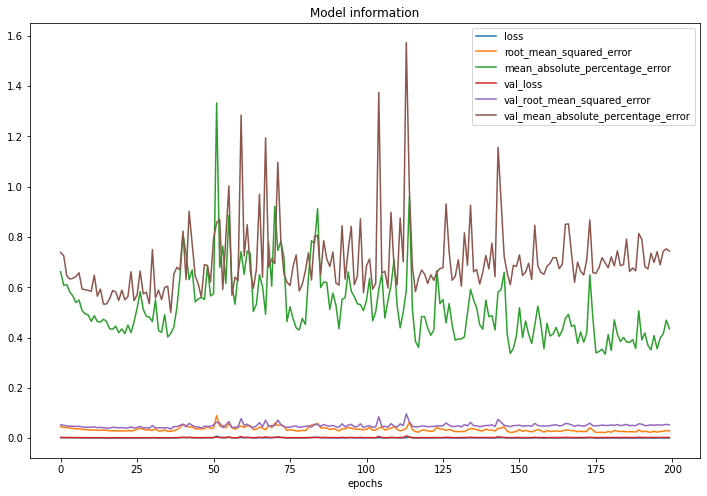

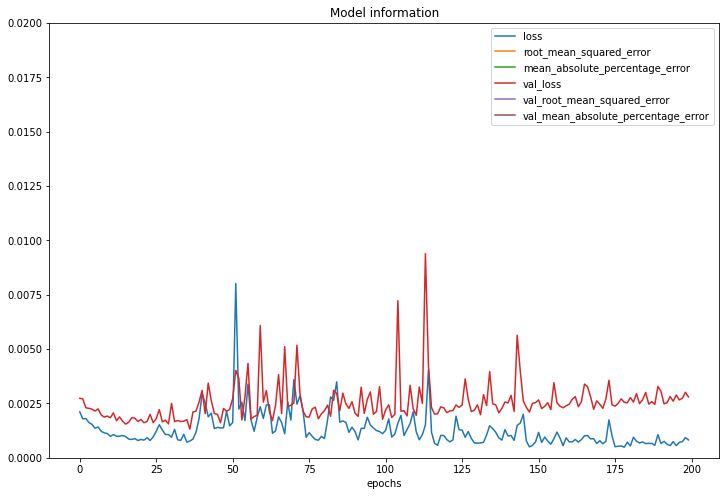

In [10]:
loss_df = pd.DataFrame(best_model.history.history)

loss_df.plot(figsize=(12,8))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

loss_df.plot(figsize=(12,8))
plt.ylim((0,0.02))
plt.title("Model information")
plt.xlabel("epochs")
plt.show()

In [11]:
from sklearn import metrics

y_pred = best_model.predict(X_test)
var_score = metrics.explained_variance_score(y_test,y_pred)
# compute the accuracy of the model 
print('Variance score:', var_score)
print('\nRMSE:',loss_df['root_mean_squared_error'].tail(1))
print('\nLoss:',loss_df['loss'].tail(1))
print('\nMAPE:',loss_df['mean_absolute_percentage_error'].tail(1))

Variance score: 0.9195731674817778

RMSE: 199    0.028691
Name: root_mean_squared_error, dtype: float64

Loss: 199    0.000823
Name: loss, dtype: float64

MAPE: 199    0.435261
Name: mean_absolute_percentage_error, dtype: float64


In [12]:
print(y_pred[0], y_test[0])

[5.1281548] 5.170211827352736


### Model 2

In [13]:
#### verbeterpunten:
# validation data gebruiken                           
# k folds
# andere metrics voor aflezen                     check
# adam vs andere andere sgd methods testen        check, Adam ziet er het best uit
# hidden layers toevoegen 
# dropout layers toevoegen                        dropout layers hebben geen positief effect op het model
# aantal nodes per layer aanpassen
# batchsize aanpassen (32, 64 of 128)             check, 32 lijkt het beste te werken
# aantal epochs                                   check, na 20 epochs lijkt het model het meest te leren, daarna improved het niet heel veel meer                                     
# onze loss plotten                               check
